# installation des librairies manquantes

In [12]:
#bibliotheque langue
import sys
#!{sys.executable} -m pip install googletrans==3.1.0a0
#!{sys.executable} -m pip install spacy
#https://fasttext.cc/docs/en/supervised-tutorial.html
# prerequis pour fastext: https://visualstudio.microsoft.com/fr/visual-cpp-build-tools/
# tuto install visual c++ https://www.youtube.com/watch?v=IsAoIqnNia4
#!{sys.executable} -m pip install fasttext
# pour stockage feather binaries des dataframe
#!{sys.executable} -m pip install pyarrow

# dezippage

In [ ]:
#dezipage
import shutil
shutil.unpack_archive('input/raw/yelp_dataset.tgz','input/')

In [ ]:
import random
import json

#fonction interessante mais erreur quand on tombe sur un caractère non reconnu
#au premier readline
#donc à ne pas utiliser mais on garde pour la comprehension et quelques tricks
def random_filter_json_toneveruse(filename,cut='proportion',p=0.01):    
    filtered_data = []
    length = -1
    #with statement : simplifie l'accés à un fichier 
    # 'r'->read
    with open(filename, 'r', encoding='utf-8') as f:
        #enumerate est un iterateur
        #permet de lire ligne à ligne de gros fichiers python
        #le trick de la commande pass permet de recup le nombre de lignes
        #la derniere valeur de length=nb lignes -1

        #nombre de lignes
        for length, l in enumerate(f):
            pass
        
        #nombre de caractères
        f.seek(0,2) #on pointe à la fin du fichier
        nbchar=f.tell() #on retrouve la valeur du pointeur de caractère
        
        print(p)
        print(length)
        print(nbchar)
        #nombre de lignes souhaitées
        countline = list(range(int(p*length)+1))


        for i in countline:
            #tirage aléatoire du pointeur de caractère
            ptchar=random.randint(0, nbchar)
            
            print(i,ptchar)
            #on pointe sur le caractère tiré
            #on sera tres probablement au milieu d'une ligne
            f.seek(ptchar,0)
                         
            #on lis une premiere fois la ligne pour rien
            #elle n'est pas entière
            #mais ca nous deplace le pointeur de caractère à la prochaine ligne
            
            print(i,f.tell())
            f.readline()
            print(i,f.tell())
            
            #maintenant que le pointeur de caractère est idéalement positionné
            #on peut lire la ligne
            data_dict = json.loads(f.readline())
            filtered_data.append(data_dict)
            
    
    return loc_filtered_data

# fonction de telechargement de gros json

In [1]:
import time
import random
import json
import pandas as pd

def random_filter_json(filename, p=0.01, typ='random', nbl=0):
    '''
    function which load partially or not a json file by line
    in different manner
        randomly or not:
        typ :'random','first','last'
        
        p between 0 and 1 : keeped proportion if p=1 -> full loading
            or
        nbl: keeped lines
        
    '''
    
    start = time.time()
    filtered_data = []
    with open(filename, 'r', encoding='utf-8') as f:
        
        #calul du nombre de lignes dans le fichier
        # ca peut prendre quelques secondes à cause de la boucle
        length=sum(1 for line in f)

        #calcul de la proportion de lignes à garder
        if nbl>0:
            p=min(1,nbl/length)
            
        
        if (p==1):
            f.seek(0,0)
            for line in f:
                data_dict = json.loads(line)
                filtered_data.append(data_dict)
    
        elif (typ=='random' and p<1):
            #on met le pointeur au debut du fchier par precaution
            #si on a deja bouclé sur le fichier , le pointeur sera à la fin
            #c est pour ca qu'on remet à 0
            f.seek(0,0)
            for line in f:
                if random.random()<=p:
                    data_dict = json.loads(line)
                    filtered_data.append(data_dict)
                
        elif (typ=='first' and p<1):
            j=-1
            #on met le pointeur au debut du fchier par precaution
            f.seek(0,0)
            for line in f:
                data_dict = json.loads(line)
                filtered_data.append(data_dict)
                j=j+1
                if j>=(p*length):
                    break
                    
        elif (typ=='last' and p<1):
            j=-1
            #on met le pointeur au debut du fchier par precaution
            f.seek(0,0)
            for line in f:
                j=j+1
                if j>=int((length-(p*length))):
                    data_dict = json.loads(line)
                    filtered_data.append(data_dict)


            
    filtered_dataframe=pd.DataFrame.from_dict(filtered_data)
    print(time.time()-start)
    return filtered_dataframe



In [3]:
#293 sec pour loading
review=random_filter_json('input/yelp_academic_dataset_review.json',
                   p=1, typ='first')
#56 sec
user=random_filter_json('input/yelp_academic_dataset_user.json',
                        p=1, typ='first')

286.44788932800293
60.36216497421265


# fonction de telechargement de petit json

In [2]:
import pandas as pd

def import_json(input,showhead=True, chunks=0):
    '''import json file to pandas dataframe
    
        if chunks=0, all the json file is directly readed in a dataframe
        if chunks>0, the json file is splited into several dataframes of chunks lines
        they will be merged at the end
        
        larger is chunks, faster is the loading but memory can be saturated
        smaller is chunks, better is the the chance to load all the file 
        
        take into account that dataframe object is heavy and even this function
        can do the job, it s not the most efficient for the large file in terms
        of time
    '''
    start = time.time()
    if chunks==0:
        output = pd.read_json(input, lines=True)
    else:
        iterator=pd.read_json(input, lines=True, chunksize=chunks)
        #initialisation du dataframe
        output=pd.dataframe()
        for chunk in iterator:
            output=output.append(chunk)
            
    print(time.time()-start)
    
    if showhead==True:
        display(output.head(5))
    
    return output


In [6]:
import time
import random
import json
import pandas as pd

business=import_json('input/yelp_academic_dataset_business.json')
checkin=import_json('input/yelp_academic_dataset_checkin.json')
tip=import_json('input/yelp_academic_dataset_tip.json')

2.5575804710388184


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


2.2492001056671143


,business_id,date
0,--0r8K_AQ4FZfLsX3ZYRDA,2017-09-03 17:13:59
1,--0zrn43LEaB4jUWTQH_Bg,"2010-10-08 22:21:20, 2010-11-01 21:29:14, 2010..."
2,--164t1nclzzmca7eDiJMw,"2010-02-26 02:06:53, 2010-02-27 08:00:09, 2010..."
3,--2aF9NhXnNVpDV0KS3xBQ,"2014-11-03 16:35:35, 2015-01-30 18:16:03, 2015..."
4,--2mEJ63SC_8_08_jGgVIg,"2010-12-15 17:10:46, 2013-12-28 00:27:54, 2015..."


6.702863454818726


,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


# petite analyse des business
* distribution des notes des reviews
* distribution du nombre de reviews

5       0.086210
6       0.069894
7       0.058667
8       0.048878
9       0.041305
          ...   
991     0.000006
1199    0.000006
1455    0.000006
1583    0.000006
1919    0.000006
Name: review_count, Length: 1281, dtype: float64

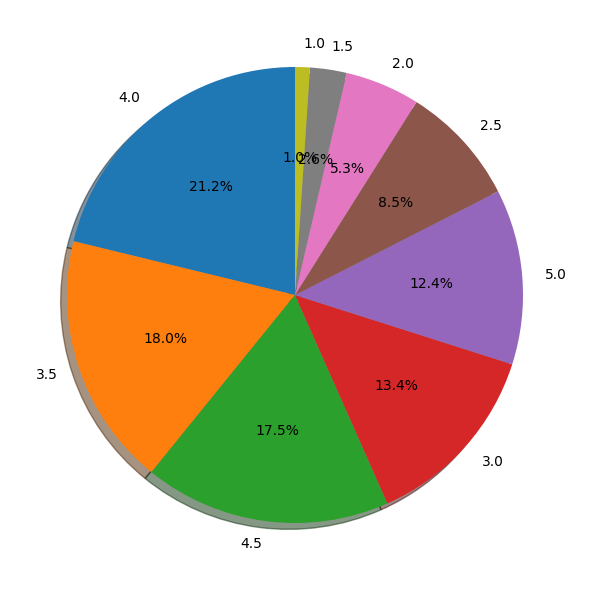

In [9]:
import matplotlib.pyplot as plt
plt.style.use('default') #specially for dark theme

pie1=business.stars.value_counts(dropna=False)
pie1=pd.DataFrame(pie1)

business.review_count.value_counts(normalize=True)

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 1)

axes.pie(pie1.stars, 
         labels=pie1.index, 
         normalize=True,
         autopct='%1.1f%%',
         shadow=True,
         startangle=90)

display(business.review_count.value_counts(normalize=True))

# detection de langage
* googletrans trop lent
* fastext rapide comme l eclair

In [ ]:
#https://stackoverflow.com/questions/39142778/python-how-to-determine-the-language
#https://stackoverflow.com/questions/52455774/googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group
#https://medium.com/analytics-vidhya/translate-list-and-pandas-data-frame-using-googletrans-library-in-python-f28b8cb84f21
from googletrans import Translator
import time
#import googletrans
#print(googletrans.__version__)

def goog_rev_lang_detect(datain=review.iloc[0:10].copy()):
    trans=Translator()

    rev=datain
    #rev['text2']=rev['text'].str[0:100]

    #detection de la langue via google trans
    #5 en 1.7 sec (0.32 dans l aprem)
    #50 en 20 sec (2.63 dans l aprem)
    #150 en 60 sec (60 dans l aprem, j'en deduis qu il y a un ralentisseur apres x requetes)
    # donc pour 22700 lignes on va tourner en 150 min , c est long
    #raccorucir le texte ne fait pas gagner de temps

    #polyglot et fasttext(facebook) doivent etre plus rapide et sont donc à tester
    #https://polyglot.readthedocs.io/en/latest/Installation.html
    #polyglot un peu chiant à installer à cause des dependances instables en windows

    start = time.time()
    rev['trans']=rev['text'].apply(trans.detect)
    print(time.time()-start)

    #separation des attributs renvoyés
    rev['lang']=rev['trans'].apply(getattr,args=('lang',))
    rev['conf']=rev['trans'].apply(getattr,args=('confidence',))

    #display(rev['lang'].value_counts(normalize=True))
    return rev





In [ ]:
#detection de langage fast
#https://fasttext.cc/docs/en/language-identification.html
#https://amitness.com/2019/07/identify-text-language-python/
import fasttext

#chargement complet 254 sec
review=random_filter_json('input/yelp_academic_dataset_review.json',
                   p=1, typ='random',nbl=0)

rev=review.copy()

#detection de la langue via fasttext
#150 en 0.02 sec: c'est rapide
#6.28 sec pour 100000 lignes c est trés rapide
#600 sec /10 min pour les plus de 8 millions de lignes

PRETRAINED_MODEL_PATH = 'fasttext_lib_lgid/lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)
#on enlève les sauts de ligne
rev['text2']=rev['text'].str.replace("\n","")

start = time.time()
#petit trick pour unpack le tuple fourni par modèl predict
rev[['lang','conf']]=pd.DataFrame(rev['text2'].apply(model.predict).tolist())
#on prend la premiere valeur des tuple
rev['lang']=rev['lang'].str[0]
rev['conf']=rev['conf'].str[0]
#on nettoie la langue
rev['lang']=rev['lang'].str.replace(r"^__label__","")
print(time.time()-start)

display(rev['lang'].value_counts(normalize=True))

# sauvegarde en binaries des gros dataframes
* pour etre plus efficace et sauvegarder
* feather semble la plus rapide : dependance pyarrow

In [ ]:
#https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d
#feather à privilegier

import time
import pandas as pd

#sauvegarde
start = time.time()
rev.to_feather('input/rev1')
print(time.time()-start)

#DL

start = time.time()
rev1=pd.read_feather('input/rev1')
print(time.time()-start)


# filtrage des reviews

In [3]:
import time
import pandas as pd
import json

#DL reviews
start = time.time()
rev1=pd.read_feather('input/rev1')
print('temps DL review bin:',time.time()-start)

#DL business
business=import_json('input/yelp_academic_dataset_business.json')

#mise en place du meme index et jointure
start = time.time()
business=business.set_index('business_id')
rev1=rev1.set_index('business_id')
rev1=rev1.join(business.review_count)
print('temps jointure review et review_count de business:',time.time()-start)

#dict unpack
#business = pd.concat([business, business['attributes'].apply(pd.Series)], axis=1)
#print(business.review_count.mean())
#print(business.review_count.median())



temps DL review bin: 0.0
2.8537752628326416


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


temps jointure review et review_count de business: 227.84871697425842


In [10]:
rev1.index.value_counts().head(1000)

4CxF8c3MB7VAdY8zFb2cZQ    9295
OQ2oHkcWA8KNC1Lsvj1SBA    7394
PrsvO1rzkgg6qFizlAoEtg    7385
zioLxtBc9THNS2TOn9xW1w    6325
y2w6rFaO0XEiG5mFfOsiFA    5220
                          ... 
m1o8TRiZp7ACWiLl6MyEmg     699
7yiTxAYqUKt2UVs4ceK57g     699
mxyCf3UlVPLFeQEDOZrphw     699
HIhgfQtM9KXpjj1iZATxiQ     699
gUHpQYwW_fd0l0hcE2i6Dg     698
Name: business_id, Length: 1000, dtype: int64

In [11]:
#filtrage
    #reviews > 698
    #language =en
    
start = time.time()
#revfilt=rev1.loc[(rev1.stars<3)]
revfilt=rev1.loc[(rev1.review_count>698)] #les 1000 plus gros restaurants
revfilt=revfilt.loc[(revfilt.lang=='en') & (revfilt.conf>0.95)]
print('temps de filtrage:',time.time()-start)

#sauvegarde
start = time.time()
revfilt=revfilt.reset_index()
revfilt.to_feather('input/revfilt')
print(time.time()-start)

temps de filtrage mauvaise note & nb de reviews: 77.3948585987091
9.002398252487183
